In [26]:
# Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [27]:
# Set up variables and functions

# Define bvp
def ansatz_bvp(y, x, epsilon = 0):
	return [y[1], (x**2 - epsilon) * y[0]]

# Define parameters
tol = 1e-6							# Tolerance
col = ['r', 'b', 'g', 'c', 'm']		# Graph colours
L = 4 								# Boundary given in problem
K = 1								# Value given in problem

xp = [-L, L]								# Boundary values
samples = int(2 * L / 0.1) + 1				# Number of samples for linspace; np doesn't like float

xspan = np.linspace(xp[0], xp[1], samples)		# Range of x


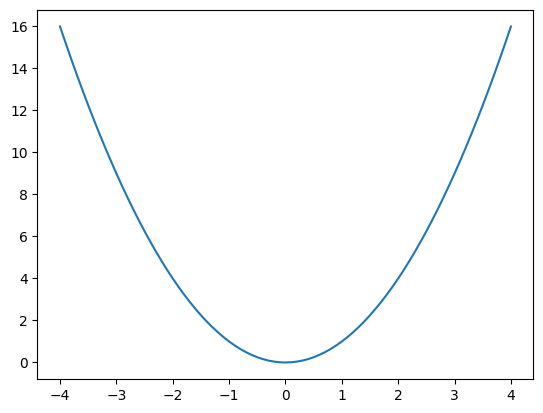

In [28]:
# Observe x behaviour
y0 = (lambda x: x**2 - 0)(xspan)	# Y values for arbitrary epsilon = 0

plt.plot(xspan, y0)

1.0000009929481903


array([0.00000000e+00, 1.99579916e-04, 4.27585458e-04, 7.13389420e-04,
       1.09029022e-03, 1.59838547e-03, 2.28732411e-03, 3.21906251e-03,
       4.47065822e-03, 6.13705959e-03, 8.33377969e-03, 1.11992774e-02,
       1.48968055e-02, 1.96154308e-02, 2.55698867e-02, 3.29988939e-02,
       4.21615892e-02, 5.33317359e-02, 6.67894698e-02, 8.28104566e-02,
       1.01652505e-01, 1.23539889e-01, 1.48645868e-01, 1.77074155e-01,
       2.08840312e-01, 2.43854282e-01, 2.81905392e-01, 3.22651254e-01,
       3.65611909e-01, 4.10170407e-01, 4.55580724e-01, 5.00983464e-01,
       5.45429321e-01, 5.87909682e-01, 6.27393175e-01, 6.62866413e-01,
       6.93376771e-01, 7.18074677e-01, 7.36252843e-01, 7.47379892e-01,
       7.51126154e-01, 7.47379893e-01, 7.36252846e-01, 7.18074680e-01,
       6.93376775e-01, 6.62866417e-01, 6.27393177e-01, 5.87909682e-01,
       5.45429318e-01, 5.00983459e-01, 4.55580717e-01, 4.10170398e-01,
       3.65611898e-01, 3.22651243e-01, 2.81905381e-01, 2.43854272e-01,
      

1.0000009929481903


array([0.00000000e+00, 1.99579916e-04, 4.27585458e-04, 7.13389420e-04,
       1.09029022e-03, 1.59838547e-03, 2.28732411e-03, 3.21906251e-03,
       4.47065822e-03, 6.13705959e-03, 8.33377969e-03, 1.11992774e-02,
       1.48968055e-02, 1.96154308e-02, 2.55698867e-02, 3.29988939e-02,
       4.21615892e-02, 5.33317359e-02, 6.67894698e-02, 8.28104566e-02,
       1.01652505e-01, 1.23539889e-01, 1.48645868e-01, 1.77074155e-01,
       2.08840312e-01, 2.43854282e-01, 2.81905392e-01, 3.22651254e-01,
       3.65611909e-01, 4.10170407e-01, 4.55580724e-01, 5.00983464e-01,
       5.45429321e-01, 5.87909682e-01, 6.27393175e-01, 6.62866413e-01,
       6.93376771e-01, 7.18074677e-01, 7.36252843e-01, 7.47379892e-01,
       7.51126154e-01, 7.47379893e-01, 7.36252846e-01, 7.18074680e-01,
       6.93376775e-01, 6.62866417e-01, 6.27393177e-01, 5.87909682e-01,
       5.45429318e-01, 5.00983459e-01, 4.55580717e-01, 4.10170398e-01,
       3.65611898e-01, 3.22651243e-01, 2.81905381e-01, 2.43854272e-01,
      

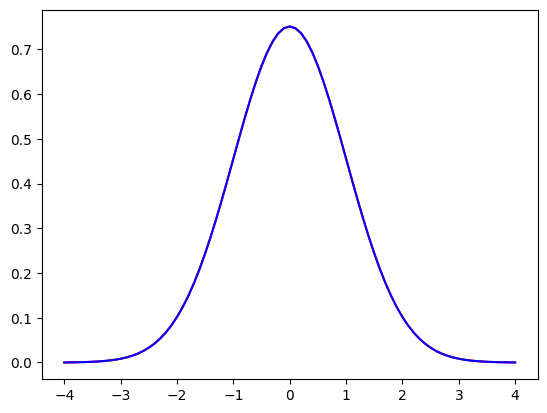

In [29]:
# Test how different A affects output
dpsi = 1			# Arbitrary initial dpsi

# CASE: dpsi = 1
epsilon0 = 0			# Initial epsilon
depsilon0 = 0.01		# Change in epsilon
y0 = [0, dpsi]			# Initial psi

for j in range(1000):
	sol = odeint(ansatz_bvp, y0, xspan, args=(epsilon0,))

	if abs(sol[-1, 0]) < tol:
		print(epsilon0)
		break						

	if (sol[-1, 0]) > 0:
		epsilon0 = epsilon0 + depsilon0
	else:
		epsilon0 = epsilon0 - depsilon0/2
		depsilon0 = depsilon0/2

y_norm = np.trapz(sol[:, 0]**2, xspan)
y_solution0 = sol[:, 0] / np.sqrt(y_norm)
plt.plot(xspan, y_solution0, 'r')
display(y_solution0)

# CASE: dpsi = 2
epsilon1 = 0		# Initial epsilon
depsilon1 = 0.01	# Change in epsilon
y1 = [0, 2*dpsi]	# Initial psi

for j in range(1000):
	sol = odeint(ansatz_bvp, y0, xspan, args=(epsilon1,))

	if abs(sol[-1, 0]) < tol:
		print(epsilon1)
		break						

	if (sol[-1, 0]) > 0:
		epsilon1 = epsilon1 + depsilon1
	else:
		epsilon1 = epsilon1 - depsilon1/2
		depsilon1 = depsilon1/2

y_norm = np.trapz(sol[:, 0]**2, xspan)
y_solution1 = sol[:, 0] / np.sqrt(y_norm)
plt.plot(xspan, y_solution1, 'b')
display(y_solution1)


In [30]:
print(epsilon0 == epsilon1)
print(y_solution0 == y_solution1)

# Returns all true
# Initial dpsi does not affect the eigenvalue nor eigenfunction output of the shooting method

True
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


1.0000004819780595
3.000014844164232
5.000204368457138
7.001717847213047
9.009745515212275


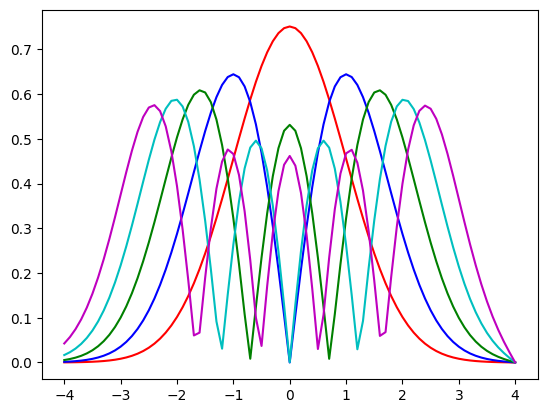

In [31]:
# Shooting

# Define our initial conditions
A = 0.1 				# Initial value for dpsi -- can be anything except 0
K = 1					# Given in problem
initial_epsilon = 0		# Initial value for epsilon
num = 5					# Number of eigenfunctions to search for
max_search = 1000		# Maximum number of iterations to find an eigenvalue

# Cumulator
eigenvalues = []
eigenfunctions = []
iterations = 0

# Find first num eigenfunctions
for modes in range(num):
	epsilon = initial_epsilon			# Start search for epsilon
	depsilon = 0.01						# Change in epsilon
	dp0 = 1								# Initial dpsi value
	p0 = dp0 / np.sqrt(L**2 - epsilon)	# Initial psi value
	psi0 = [p0, dp0]					# Initial values for psi and dpsi 
	
	for j in range(max_search):	# Find epsilon in max number of steps; fail safe
		sol = odeint(ansatz_bvp, psi0, xspan, args=(epsilon,))	# Solve ODE for current epsilon

		if abs(sol[-1,0] / p0) < tol:	# If found solution is below tolerance
			print(epsilon) 					# Log eigenvalue
			eigenvalues.append(epsilon)		# Save eigenvalue
			break							# Stop searching; move onto next eigenvalue

		if (-1) ** (modes) * (sol[-1,0] / p0) > 0:	# If below target
			epsilon = epsilon + depsilon 	# Increase epsilon
		else:									# Otherwise above target
			epsilon = epsilon - depsilon/2	# Binary search for epsilon
			depsilon = depsilon/2			# Binary search for epsilon

	initial_epsilon = epsilon + 0.1		# Increase epsilon; search for next eigenvalue

	iterations += j									# Count iterations
	y_norm = np.trapz(sol[:,0]**2, xspan)			# Normalize Schrodinger pdf
	y_solution = np.abs(sol[:,0])/np.sqrt(y_norm)	# Divide by norm
	eigenfunctions.append(y_solution)				# Save eigenfunction
	plt.plot(xspan, y_solution, col[modes])			# Add to plot

plt.show()  # Display found eigenfunctions
phi_abs = np.abs(eigenfunctions).T
Sigma = np.vstack(eigenvalues)

In [32]:
# Number of iterations to find all eigenvalues
display(iterations)

1026

In [33]:
display(Sigma)

array([[1.00000048],
       [3.00001484],
       [5.00020437],
       [7.00171785],
       [9.00974552]])